In [5]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 22
plt.rcParams['lines.linewidth'] = 3
import seaborn as sns
# sns.set_context('talk')
import scipy.stats as ss
import math

from scipy.integrate import simpson, trapezoid
import numpy as np
from scipy.interpolate import UnivariateSpline, interp1d
from ipywidgets import interact
import ipywidgets as widgets
from scipy.stats import gaussian_kde

import riskDualObserverSeperate as model
import tools as tools


In [4]:
type = "linearIncrease"

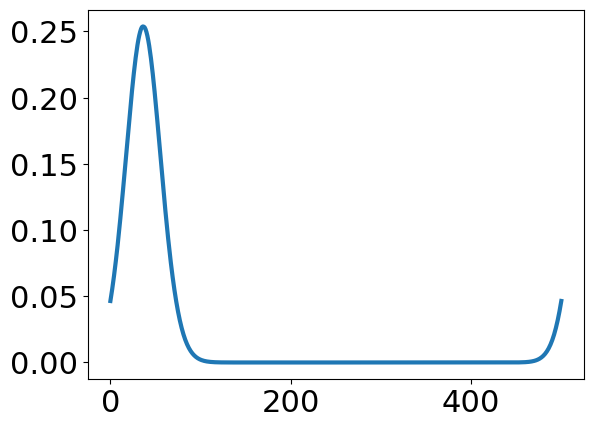

In [7]:
theta0 = 10./90.*np.pi
kappa_s = 1000
kappa_r = 16
sigma_rep = np.sqrt(tools.factor_val/16)
type = "linearIncrease"
stim_val_grid, val_input = model.input_to_val_system(theta0, kappa_s, kappa_r, type, p_per = 8)

plt.plot(val_input[0])


(1, 501)


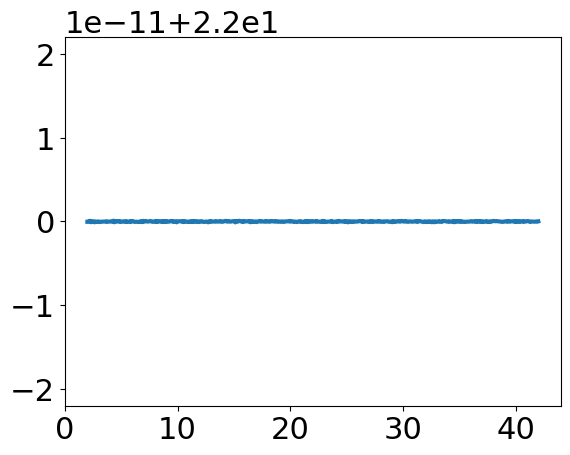

In [15]:
stim_val_grid, cdf_value = tools.cdf_val(type)
# Make a big array that for many thetas gives the probability of observing ms (value likelihood)
p_mVal_given_theta = (val_input)[..., np.newaxis] *\
    tools.sensory_val_noise(cdf_value[np.newaxis, :, np.newaxis], sigma_rep, tools.rep_val_grid[np.newaxis, np.newaxis, :])
p_mVal_given_theta = trapezoid(p_mVal_given_theta, stim_val_grid, axis=1)


# Since the value function is monotonic, again simply putting it in increasing order of values.
# Just increase or decreasse based rearrangement. Nothing else. 
p_mVal_given_val = p_mVal_given_theta[:,np.argsort(tools.value_function_ori(tools.stim_ori_grid, type))]

# The prior_val here is the prior over values constructed from combining the
# value function and the contextual decoding prior developed during training.
safe_value, val_prior = tools.prior_val(type)

# Applying bayes rule to get the p(val/m).
p_val_given_mVal = p_mVal_given_val*np.array(val_prior)[:, np.newaxis]
# Normalize with p(m) = p(m|val)*p(val) that we just defined as p(val|m) in above line
p_val_given_mVal = p_val_given_mVal / trapezoid(p_val_given_mVal, safe_value, axis=0)[np.newaxis,:]

x0 = trapezoid(safe_value[:, np.newaxis]*p_val_given_mVal, safe_value, axis=0)
# if p_val == 2:
val_estimates = x0
val_estimates = np.array(val_estimates)

plt.plot(model.rep_val_grid, val_estimates)

# else:
#     val_estimates = []
#     for ix in range(len(x0)):
#         cost_function = lambda valest: np.sum(p_val_given_mVal[:, ix] * np.abs(safe_value - valest)**(p_val))
#         jacobian = lambda valest: -np.sum(p_val_given_mVal[:, ix] * (p_val * np.abs(safe_value - valest)**(p_val-1)))

#         x = minimize(cost_function, x0[ix], method='BFGS', jac=jacobian).x[0]
#         val_estimates.append(x)
    
#     val_estimates = np.array(val_estimates)


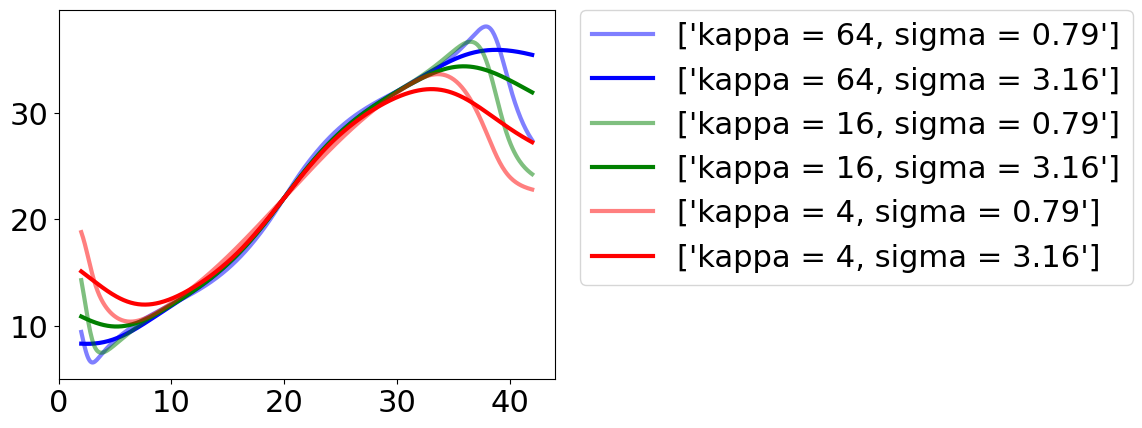

In [54]:

type = "scaled_cdf"
theta0 = 25./90.*np.pi
kappa_s = 1000000
kappa_rs = [64, 16, 4]
sigma_reps = [np.sqrt(tools.factor_val/64), np.sqrt(tools.factor_val/4)]
fig = plt.figure()
ax1 = fig.add_subplot(111)

colorList = ["b", "g", "r", "m", "y", "k"]
alphaList = np.linspace(0.5, 1.0, 2)

i = -1
for kappa_r in kappa_rs:
    i = i+1
    j = -1
    for sigma_rep in sigma_reps:
        j = j+1
        val_estimates = model.subject_val_estimate(kappa_s, kappa_r, sigma_rep, type, p_val = 2)

        ax1.plot(model.rep_val_grid, val_estimates, label = ["kappa = " + str(kappa_r)+", sigma = " + str(round(sigma_rep,2))], color = colorList[i], alpha = alphaList[j])

ax1.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)


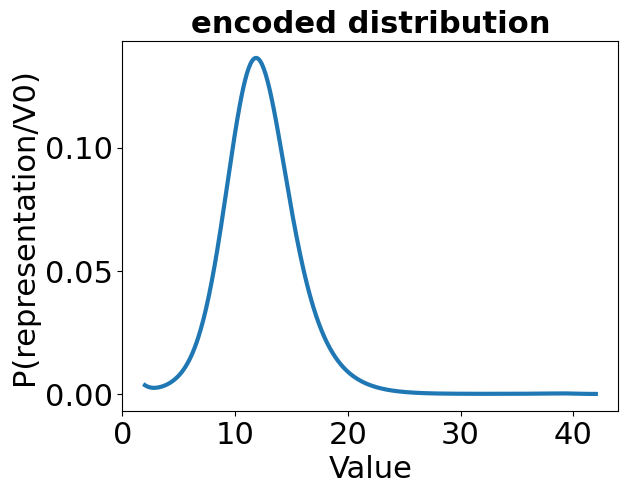

In [3]:
theta0 = 60./90.*np.pi
kappa_s = 10000
kappa_r = 4
sigma_rep = np.sqrt(tools.factor_val/64) # The division is with teh analog of kappa
type = "scaled_cdf"

p_mVal_given_theta0 = model.value_efficient_encoding(theta0, kappa_s, kappa_r, sigma_rep, type, p_per = 8)

# p_m_given_theta[np.argsort(tools.value_function_ori(tools.stim_ori_grid, type))]

plt.plot(model.rep_val_grid, p_mVal_given_theta0[0])


plt.ylabel("P(representation/V0)")
plt.xlabel("Value")
plt.title("encoded distribution", size = 22,fontweight="bold")

# np.shape(p_mVal_given_val)

plt.savefig('/Users/sbedi/Downloads/teig.png',dpi=300, bbox_inches = "tight")



80.28
[[0.46152037]]


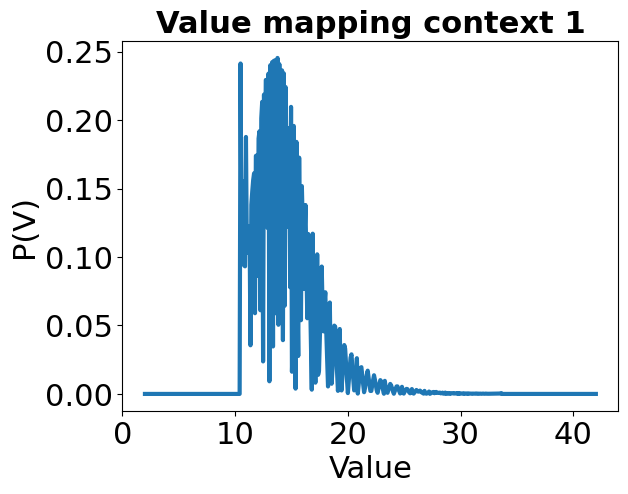

In [4]:

risk_prob = 0.75
type = "scaled_cdf"
theta1 = float(tools.inverse_monotonic(tools.value_function_ori(theta0, type)/risk_prob, type))

print(theta1*90/np.pi)

safe_value, safe_prob = model.safe_value_dist(theta0, kappa_s, kappa_r, sigma_rep, type, p_val = 2, p_per = 8)
rr, risky_prob = model.risky_value_dist(theta1, kappa_s, kappa_r, sigma_rep, risk_prob, type, p_val = 2, p_per = 8)

plt.plot(safe_value, safe_prob[0])
# plt.plot(rr, risky_prob[0])

p_chose_risky = tools.diff_dist(safe_value, risky_prob, safe_prob)
print(p_chose_risky)

plt.xlabel("Value")
plt.ylabel("P(V)")
plt.title("Value mapping context 1", size = 22,fontweight="bold")

plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")


In [ ]:
abs(trapezoid(safe_prob[0], safe_value, axis = -1))

0.9999999999999999

# Value biases already

1.0
1.0
1.0
4.06896551724138
0.6425085030313251
7.137931034482759
0.36855940058251946
10.206896551724139
0.39658224846180956
13.27586206896552
0.42848604089554987
16.344827586206904
0.4929943374430179
19.41379310344828
0.4639877080049204
22.482758620689662
0.5037130385985389
25.551724137931043
0.5198755554483958
28.62068965517242
0.5192957912864375
31.689655172413804
0.5332558810043322
34.75862068965518
0.48991081424156757
37.82758620689656
0.5768786217969074
40.896551724137936
0.5762606955704348
43.96551724137932
0.5834686563850161
47.0344827586207
0.5699981441572067
50.10344827586208
0.5589469871142198
53.17241379310346
0.5200223019746903
56.24137931034484
0.5768767555233382
59.31034482758622
0.5308056898214542
62.3793103448276
0.5852831929037338
65.44827586206897
0.5531365164471752
68.51724137931036
0.5572781688087298
71.58620689655173
0.5141662174594939
74.65517241379312
0.5249154520284396
77.72413793103449
0.5193773607424824
80.79310344827587
0.5482085319369647
83.86206896551725
0

/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_7816/2296620571.py:82: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


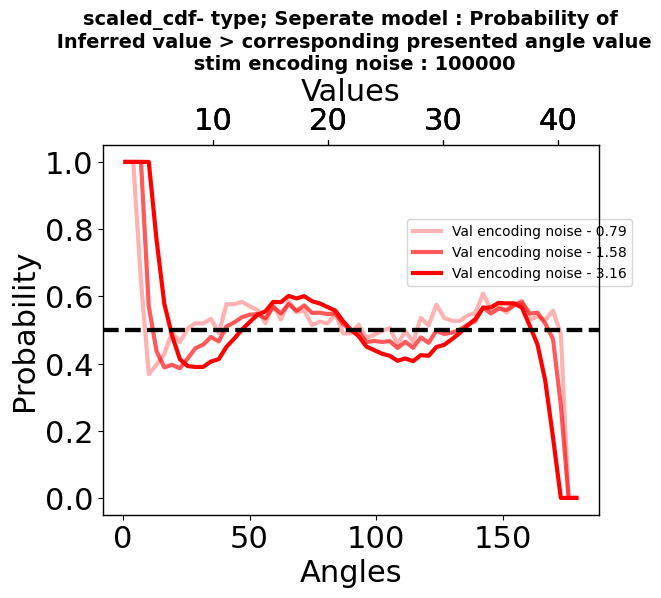

In [72]:

type = "scaled_cdf"

kappa_s = 1000000
kappa_r = 100000
sigma_rep = [np.sqrt(tools.factor_val/64), np.sqrt(tools.factor_val/16), np.sqrt(tools.factor_val/4)]

end = int(tools.experimentRange[-3:])-1
start = int(tools.experimentRange[0:2])+1
end = end/90.*np.pi
start = start/90.*np.pi
    
signs = ["x", "o", ".", "v"] 
colorList = ["b", "g", "r", "m", "y", "k"]
alphaList = np.linspace(0.3, 1.0, len(sigma_rep))
# alphaList = alphaList[np.argsort(sigma_rep)][::-1]

fig = plt.figure()
ax1 = fig.add_subplot(111)


safe_angles = np.linspace(start, end, int((start*90/np.pi+end*90/np.pi-1)/3))

for k, sigma_rep in enumerate(sigma_rep):
    prob_greater_perception = np.zeros(len(safe_angles))
    safe_Val_presented = tools.value_function_ori(safe_angles, type)
    plot_lines = []

    for i in range(len(safe_angles)):
        # fig2 = plt.figure()
        # ax2 = fig2.add_subplot(111)
        safe_value, safe_prob = model.safe_value_dist(safe_angles[i], kappa_s, kappa_r, sigma_rep, type, p_val = 2, p_per = 8)

        prob = tools.dist_greater(safe_value, safe_prob, safe_Val_presented[i])
        prob_greater_perception[i] = prob

        print(prob)
        print(safe_angles[i]*90/np.pi)

        # labels = ["Inferred value from presented angle", "True value corresponding to presented angle"]

        # l1, = ax2.plot(safe_value, safe_prob[0], color = "b", label=labels[0])
        # l2 = ax2.axvline(x = safe_Val_presented[i], color = "k", label=labels[1])
        # plot_lines.append([l1, l2])
        # # plt.ylim(bottom=0, top=0.3)
        # text = "Probability of inferred value being greater = "+str(round(prob, 2))
        # ax2.set_xlabel("Values")
        # ax2.set_ylabel("Probability distribution")
        # if type == "scaled_cdf":
        #     ax2.set_title("Effect of noise on predicted discrepancies between\n inferred and presented value from perception model", fontdict={"fontsize": 14, "fontweight": "bold"})
        # else:
        #     ax2.set_title("Effect of noise on predicted discrepancies between\n inferred and presented value from perception model", fontdict={"fontsize": 14, "fontweight": "bold"})

        # ax2.ylim(0.4, 0.6)
        # ax2.text(0.4,0.05, text, style='italic', bbox={'facecolor': 'red', 'alpha': 0.4, 'pad': 3},  fontsize=10)
        # ax2.legend(handles=[l1, l2], labels=labels,  fontsize=10, loc = "upper right")
        # fig2.savefig(f'/Users/sbedi/Downloads/percept%02d.png'%i,dpi=300, bbox_inches = "tight")
 
        # plt.show()
        
    # ax1.set_ylim(0.4, 0.6)
    ax1.plot(safe_angles*90./np.pi, prob_greater_perception, color=colorList[2], alpha = alphaList[k], label="Val encoding noise - "+str(round(sigma_rep,2)))
    ax3 = ax1.twiny()
    ax3.plot(safe_Val_presented, np.ones(len(safe_Val_presented))/1.3, alpha=0.0)

ax1.axhline(0.5, c='k', ls='--')
ax1.set_xlabel("Angles")
ax3.set_xlabel("Values")
# if type == "scaled_cdf":
#     ax1.set_title("value mapping - "+ str(tools.scaling) + type+"; Perceptual model : Probability of\n Inferred value > corresponding presented angle value", fontdict={"fontsize": 14, "fontweight": "bold"})
# else:
ax1.set_title(type+"- type; Seperate model : Probability of\n Inferred value > corresponding presented angle value\n stim encoding noise : "+str(round(kappa_r,2)), fontdict={"fontsize": 14, "fontweight": "bold"})

# noiseText = "stimulus noise ($\kappa_s$) = "+str(kappa_s)+ ";\n val encoding noise ($\kappa_r) = $"+str(kappa_r)
# ax1.text(0.4,0.3, noiseText, style='italic', bbox={'facecolor': 'red', 'alpha': 0.4, 'pad': 3},  fontsize=10)


ax1.axhline(0.5, c='k', ls='--')
ax1.set_ylabel("Probability")

ax1.legend(bbox_to_anchor=(0.6, 0.6), prop={'size': 10})
fig.savefig(f'/Users/sbedi/Downloads/sepModelSingleOption'+str(i)+'.png',dpi=300, bbox_inches = "tight")
fig.show()

1.0
1.0
1.0
4.06896551724138
1.0
7.137931034482759
0.5498294170030935
10.206896551724139
0.4917143427347903
13.27586206896552
0.5012994163992395
16.344827586206904
0.5501225025117328
19.41379310344828
0.5300679068134194
22.482758620689662
0.503925452543458
25.551724137931043
0.5105106795950447
28.62068965517242
0.5225406766602646
31.689655172413804
0.5286142116587896
34.75862068965518
0.5039114659149481
37.82758620689656
0.5330120305219821
40.896551724137936
0.5026399474847586
43.96551724137932
0.509258488251487
47.0344827586207
0.48303204134201516
50.10344827586208
0.5115650225811714
53.17241379310346
0.4946448838392232
56.24137931034484
0.5214284467706285
59.31034482758622
0.47569858058586534
62.3793103448276
0.5084930684007469
65.44827586206897
0.48761125892574353
68.51724137931036
0.5195000865844086
71.58620689655173
0.5047932537416102
74.65517241379312
0.5173629615044395
77.72413793103449
0.49897517803011016
80.79310344827587
0.48124034657078574
83.86206896551725
0.499465851108748

/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_7816/1525662541.py:82: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


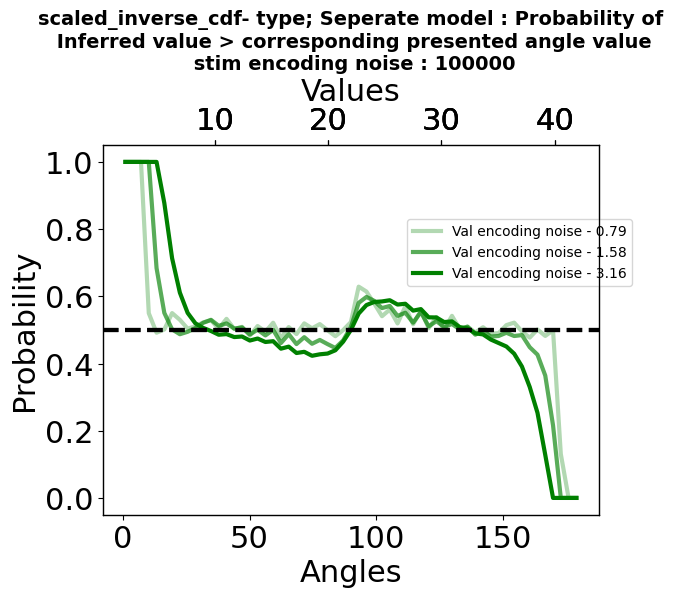

In [73]:

type = "scaled_inverse_cdf"

kappa_s = 1000000
kappa_r = 100000
sigma_rep = [np.sqrt(tools.factor_val/64), np.sqrt(tools.factor_val/16), np.sqrt(tools.factor_val/4)]

end = int(tools.experimentRange[-3:])-1
start = int(tools.experimentRange[0:2])+1
end = end/90.*np.pi
start = start/90.*np.pi
    
signs = ["x", "o", ".", "v"] 
colorList = ["b", "g", "r", "m", "y", "k"]
alphaList = np.linspace(0.3, 1.0, len(sigma_rep))
# alphaList = alphaList[np.argsort(sigma_rep)][::-1]

fig = plt.figure()
ax1 = fig.add_subplot(111)


safe_angles = np.linspace(start, end, int((start*90/np.pi+end*90/np.pi-1)/3))

for k, sigma_rep in enumerate(sigma_rep):
    prob_greater_perception = np.zeros(len(safe_angles))
    safe_Val_presented = tools.value_function_ori(safe_angles, type)
    plot_lines = []

    for i in range(len(safe_angles)):
        # fig2 = plt.figure()
        # ax2 = fig2.add_subplot(111)
        safe_value, safe_prob = model.safe_value_dist(safe_angles[i], kappa_s, kappa_r, sigma_rep, type, p_val = 2, p_per = 8)

        prob = tools.dist_greater(safe_value, safe_prob, safe_Val_presented[i])
        prob_greater_perception[i] = prob

        print(prob)
        print(safe_angles[i]*90/np.pi)

        # labels = ["Inferred value from presented angle", "True value corresponding to presented angle"]

        # l1, = ax2.plot(safe_value, safe_prob[0], color = "b", label=labels[0])
        # l2 = ax2.axvline(x = safe_Val_presented[i], color = "k", label=labels[1])
        # plot_lines.append([l1, l2])
        # # plt.ylim(bottom=0, top=0.3)
        # text = "Probability of inferred value being greater = "+str(round(prob, 2))
        # ax2.set_xlabel("Values")
        # ax2.set_ylabel("Probability distribution")
        # if type == "scaled_cdf":
        #     ax2.set_title("Effect of noise on predicted discrepancies between\n inferred and presented value from perception model", fontdict={"fontsize": 14, "fontweight": "bold"})
        # else:
        #     ax2.set_title("Effect of noise on predicted discrepancies between\n inferred and presented value from perception model", fontdict={"fontsize": 14, "fontweight": "bold"})

        # ax2.ylim(0.4, 0.6)
        # ax2.text(0.4,0.05, text, style='italic', bbox={'facecolor': 'red', 'alpha': 0.4, 'pad': 3},  fontsize=10)
        # ax2.legend(handles=[l1, l2], labels=labels,  fontsize=10, loc = "upper right")
        # fig2.savefig(f'/Users/sbedi/Downloads/percept%02d.png'%i,dpi=300, bbox_inches = "tight")
 
        # plt.show()
        
    # ax1.set_ylim(0.4, 0.6)
    ax1.plot(safe_angles*90./np.pi, prob_greater_perception, color=colorList[1], alpha = alphaList[k], label="Val encoding noise - "+str(round(sigma_rep,2)))
    ax3 = ax1.twiny()
    ax3.plot(safe_Val_presented, np.ones(len(safe_Val_presented))/1.3, alpha=0.0)

ax1.axhline(0.5, c='k', ls='--')
ax1.set_xlabel("Angles")
ax3.set_xlabel("Values")
# if type == "scaled_cdf":
#     ax1.set_title("value mapping - "+ str(tools.scaling) + type+"; Perceptual model : Probability of\n Inferred value > corresponding presented angle value", fontdict={"fontsize": 14, "fontweight": "bold"})
# else:
ax1.set_title(type+"- type; Seperate model : Probability of\n Inferred value > corresponding presented angle value\n stim encoding noise : "+str(round(kappa_r,2)), fontdict={"fontsize": 14, "fontweight": "bold"})

# noiseText = "stimulus noise ($\kappa_s$) = "+str(kappa_s)+ ";\n val encoding noise ($\kappa_r) = $"+str(kappa_r)
# ax1.text(0.4,0.3, noiseText, style='italic', bbox={'facecolor': 'red', 'alpha': 0.4, 'pad': 3},  fontsize=10)


ax1.axhline(0.5, c='k', ls='--')
ax1.set_ylabel("Probability")

ax1.legend(bbox_to_anchor=(0.6, 0.6), prop={'size': 10})
fig.savefig(f'/Users/sbedi/Downloads/sepModelSingleOption'+str(i)+'.png',dpi=300, bbox_inches = "tight")
fig.show()

1.0
1.0
1.0
4.06896551724138
1.0
7.137931034482759
0.4000599035786032
10.206896551724139
0.4229865391759813
13.27586206896552
0.4493986417704319
16.344827586206904
0.5273841724111383
19.41379310344828
0.5034325298759221
22.482758620689662
0.5318797772009504
25.551724137931043
0.5092949454334681
28.62068965517242
0.5071083782444985
31.689655172413804
0.5543687356546079
34.75862068965518
0.4749692465399177
37.82758620689656
0.5488882249316738
40.896551724137936
0.5256504220069309
43.96551724137932
0.514925748669849
47.0344827586207
0.48380884145598413
50.10344827586208
0.5455861029486426
53.17241379310346
0.4687904882624907
56.24137931034484
0.5451063653433219
59.31034482758622
0.49896706083093767
62.3793103448276
0.5159576702837142
65.44827586206897
0.49505463126717486
68.51724137931036
0.549004955590282
71.58620689655173
0.5008370129776365
74.65517241379312
0.5364822830794533
77.72413793103449
0.5056135906641757
80.79310344827587
0.540428899021809
83.86206896551725
0.49156353806701936


/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_7816/266653978.py:82: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


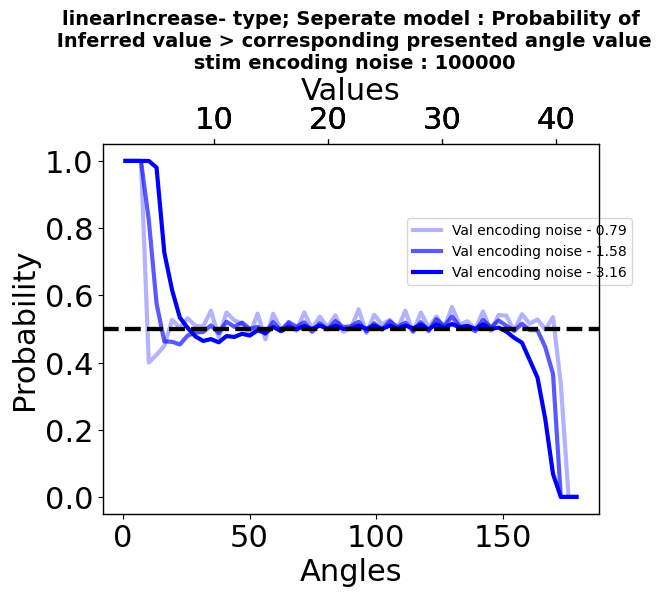

In [74]:

type = "linearIncrease"

kappa_s = 1000000
kappa_r = 100000
sigma_rep = [np.sqrt(tools.factor_val/64), np.sqrt(tools.factor_val/16), np.sqrt(tools.factor_val/4)]

end = int(tools.experimentRange[-3:])-1
start = int(tools.experimentRange[0:2])+1
end = end/90.*np.pi
start = start/90.*np.pi
    
signs = ["x", "o", ".", "v"] 
colorList = ["b", "g", "r", "m", "y", "k"]
alphaList = np.linspace(0.3, 1.0, len(sigma_rep))
# alphaList = alphaList[np.argsort(sigma_rep)][::-1]

fig = plt.figure()
ax1 = fig.add_subplot(111)


safe_angles = np.linspace(start, end, int((start*90/np.pi+end*90/np.pi-1)/3))

for k, sigma_rep in enumerate(sigma_rep):
    prob_greater_perception = np.zeros(len(safe_angles))
    safe_Val_presented = tools.value_function_ori(safe_angles, type)
    plot_lines = []

    for i in range(len(safe_angles)):
        # fig2 = plt.figure()
        # ax2 = fig2.add_subplot(111)
        safe_value, safe_prob = model.safe_value_dist(safe_angles[i], kappa_s, kappa_r, sigma_rep, type, p_val = 2, p_per = 8)

        prob = tools.dist_greater(safe_value, safe_prob, safe_Val_presented[i])
        prob_greater_perception[i] = prob

        print(prob)
        print(safe_angles[i]*90/np.pi)

        # labels = ["Inferred value from presented angle", "True value corresponding to presented angle"]

        # l1, = ax2.plot(safe_value, safe_prob[0], color = "b", label=labels[0])
        # l2 = ax2.axvline(x = safe_Val_presented[i], color = "k", label=labels[1])
        # plot_lines.append([l1, l2])
        # # plt.ylim(bottom=0, top=0.3)
        # text = "Probability of inferred value being greater = "+str(round(prob, 2))
        # ax2.set_xlabel("Values")
        # ax2.set_ylabel("Probability distribution")
        # if type == "scaled_cdf":
        #     ax2.set_title("Effect of noise on predicted discrepancies between\n inferred and presented value from perception model", fontdict={"fontsize": 14, "fontweight": "bold"})
        # else:
        #     ax2.set_title("Effect of noise on predicted discrepancies between\n inferred and presented value from perception model", fontdict={"fontsize": 14, "fontweight": "bold"})

        # ax2.ylim(0.4, 0.6)
        # ax2.text(0.4,0.05, text, style='italic', bbox={'facecolor': 'red', 'alpha': 0.4, 'pad': 3},  fontsize=10)
        # ax2.legend(handles=[l1, l2], labels=labels,  fontsize=10, loc = "upper right")
        # fig2.savefig(f'/Users/sbedi/Downloads/percept%02d.png'%i,dpi=300, bbox_inches = "tight")
 
        # plt.show()
        
    # ax1.set_ylim(0.4, 0.6)
    ax1.plot(safe_angles*90./np.pi, prob_greater_perception, color=colorList[0], alpha = alphaList[k], label="Val encoding noise - "+str(round(sigma_rep,2)))
    ax3 = ax1.twiny()
    ax3.plot(safe_Val_presented, np.ones(len(safe_Val_presented))/1.3, alpha=0.0)

ax1.axhline(0.5, c='k', ls='--')
ax1.set_xlabel("Angles")
ax3.set_xlabel("Values")
# if type == "scaled_cdf":
#     ax1.set_title("value mapping - "+ str(tools.scaling) + type+"; Perceptual model : Probability of\n Inferred value > corresponding presented angle value", fontdict={"fontsize": 14, "fontweight": "bold"})
# else:
ax1.set_title(type+"- type; Seperate model : Probability of\n Inferred value > corresponding presented angle value\n stim encoding noise : "+str(round(kappa_r,2)), fontdict={"fontsize": 14, "fontweight": "bold"})

# noiseText = "stimulus noise ($\kappa_s$) = "+str(kappa_s)+ ";\n val encoding noise ($\kappa_r) = $"+str(kappa_r)
# ax1.text(0.4,0.3, noiseText, style='italic', bbox={'facecolor': 'red', 'alpha': 0.4, 'pad': 3},  fontsize=10)


ax1.axhline(0.5, c='k', ls='--')
ax1.set_ylabel("Probability")

ax1.legend(bbox_to_anchor=(0.6, 0.6), prop={'size': 10})
fig.savefig(f'/Users/sbedi/Downloads/sepModelSingleOption'+str(i)+'.png',dpi=300, bbox_inches = "tight")
fig.show()

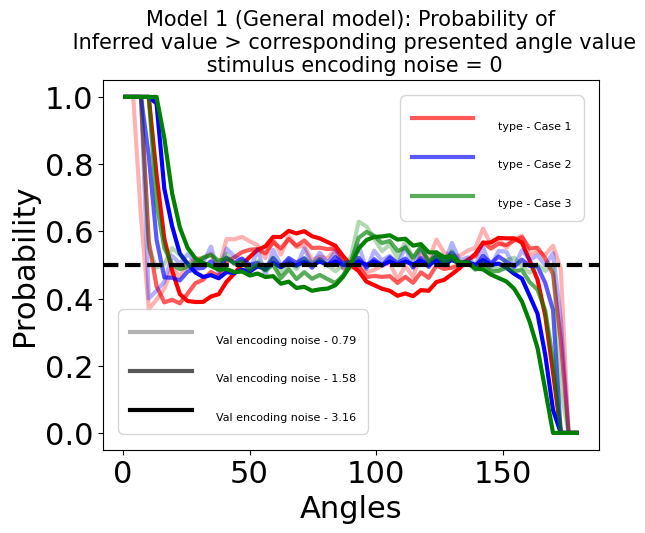

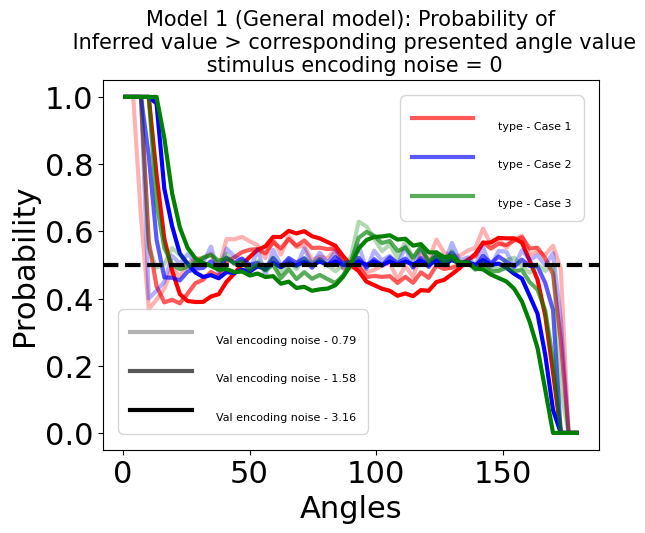

In [113]:

types = ["scaled_cdf", "linearIncrease", "scaled_inverse_cdf"]

kappa_s = 1000000
kappa_r = 100000
sigma_repl = [np.sqrt(tools.factor_val/64), np.sqrt(tools.factor_val/16), np.sqrt(tools.factor_val/4)]

end = int(tools.experimentRange[-3:])-1
start = int(tools.experimentRange[0:2])+1
end = end/90.*np.pi
start = start/90.*np.pi
    
signs = ["x", "o", ".", "v"] 
colorList = ["r", "b", "g", "m", "y", "k"]
alphaList = np.linspace(0.3, 1.0, len(sigma_repl))
# alphaList = alphaList[np.argsort(sigma_rep)][::-1]

fig = plt.figure()
ax1 = fig.add_subplot(111)


safe_angles = np.linspace(start, end, int((start*90/np.pi+end*90/np.pi-1)/3))

# Plot lines for the type legend
type_lines = []
for j, type in enumerate(types):
    line = None  # Keep track of the legend line for each type
    for k, sigma_rep in enumerate(sigma_repl):
        prob_greater_perception = np.zeros(len(safe_angles))
        safe_Val_presented = tools.value_function_ori(safe_angles, type)
        plot_lines = []

        for i in range(len(safe_angles)):
            # fig2 = plt.figure()
            # ax2 = fig2.add_subplot(111)
            safe_value, safe_prob = model.safe_value_dist(safe_angles[i], kappa_s, kappa_r, sigma_rep, type, p_val = 2, p_per = 8)

            prob = tools.dist_greater(safe_value, safe_prob, safe_Val_presented[i])
            prob_greater_perception[i] = prob

        # Plot lines for each sigma_rep for each type
        line = ax1.plot(
            safe_angles * 90. / np.pi,
            prob_greater_perception,
            label=f"type - Case "+str(j+1) if k == 1 else None,
            color=colorList[j], alpha = alphaList[k]
        )
    if line:
        type_lines.append(line[0])

ax1.axhline(0.5, c='k', ls='--')
ax1.set_xlabel("Angles")
ax3.set_xlabel("Values")
# if type == "scaled_cdf":
#     ax1.set_title("value mapping - "+ str(tools.scaling) + type+"; Perceptual model : Probability of\n Inferred value > corresponding presented angle value", fontdict={"fontsize": 14, "fontweight": "bold"})
# else:
ax1.set_title("Seperate model : Probability of\n Inferred value > corresponding presented angle value\n stim encoding noise (kappa) : "+str(round(kappa_r,2)), fontdict={"fontsize": 14, "fontweight": "bold"})

ax1.set_ylabel("Probability")
# legend_type = ax1.legend(handles=type_lines, loc="upper right")

# Plot lines for the alpha legend
alpha_lines = []
for k, sigma_rep in enumerate(sigma_repl):
    # Dummy plot lines for the alpha legend
    line = ax1.plot([], [], alpha=alphaList[k], label=f"Val encoding noise - {round(sigma_rep, 2)}", color='k')
    alpha_lines.append(line[0])

# Remove all existing legends from the plot
ax1.legend([], [])

# Get all the legend handles and labels (which will be empty)
handles, labels = ax1.get_legend_handles_labels()

# Find the indices of the legend handles associated with the value encoding noise
indices_noise = [i for i, label in enumerate(labels) if "Val encoding noise" in label]

# Find the indices of the legend handles associated with the types
indices_types = [i for i, label in enumerate(labels) if "type -" in label]

# Filter handles and labels for value encoding noise
handles_noise = [handles[i] for i in indices_noise]
labels_noise = [labels[i] for i in indices_noise]

# Filter handles and labels for types
handles_types = [handles[i] for i in indices_types]
labels_types = [labels[i] for i in indices_types]

# Create separate legends for value encoding noise and types
legend_noise = ax1.legend(handles_noise, labels_noise, loc="lower left")
legend_types = ax1.legend(handles_types, labels_types, loc="upper right")

# Set the font size of the legend labels for value encoding noise
for text in legend_noise.get_texts():
    text.set_fontsize(8)

# Set the font size of the legend labels for types
for text in legend_types.get_texts():
    text.set_fontsize(8)

# Add the legends to the plot
ax1.add_artist(legend_noise)

# Adjust the position of the legend for types
legend_types.set_bbox_to_anchor((1.0, 1.0))  # Move type legend slightly higher

ax1.set_title('Model 1 (General model): Probability of\n Inferred value > corresponding presented angle value\n stimulus encoding noise = 0', fontsize=15)

# Redraw the figure
fig.canvas.draw()
fig

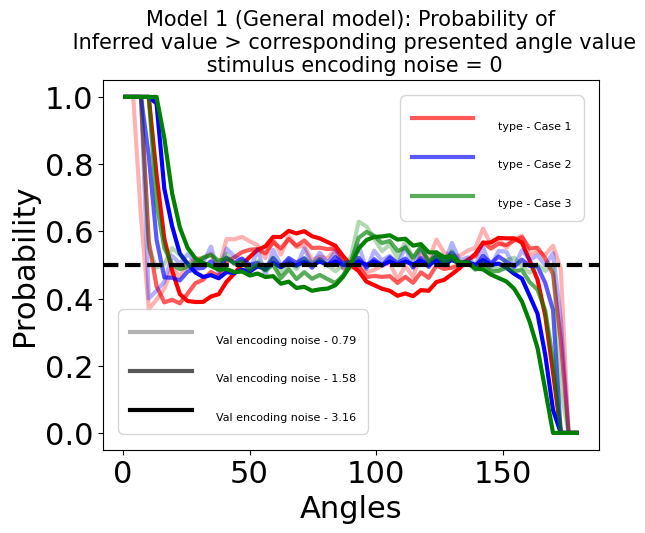

In [115]:

ax1.set_title('Model 1 (General model): Probability of\n Inferred value > corresponding presented angle value\n stimulus encoding noise = 0', fontsize=15)

# Redraw the figure
fig.canvas.draw()
fig

TypeError: MI_efficient_encoding() got an unexpected keyword argument 'normalize'

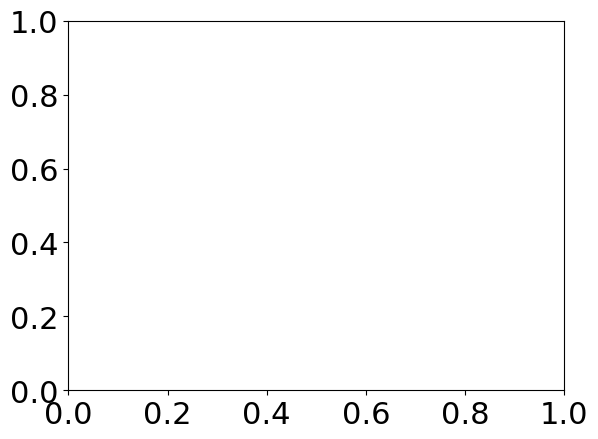

In [7]:

types = ["scaled_cdf", "linearIncrease", "scaled_inverse_cdf"]

kappa_s = 1000000
kappa_rl = [16]
sigma_rep = np.sqrt(tools.factor_val/4)
alphaList = np.linspace(1., 1., 3)

end = int(tools.experimentRange[-3:])-1
start = int(tools.experimentRange[0:2])+1
end = end/90.*np.pi
start = start/90.*np.pi
    
signs = ["x", "o", ".", "v"] 
colorList = ["r", "b", "g", "m", "y", "k"]
# alphaList = alphaList[np.argsort(sigma_rep)][::-1]

fig = plt.figure()
ax1 = fig.add_subplot(111)


safe_angles = np.linspace(start, end, int((start*90/np.pi+end*90/np.pi-1)/3))

# Plot lines for the type legend
type_lines = []
for j, type in enumerate(types):
    line = None  # Keep track of the legend line for each type
    for k, kappa_rep in enumerate(kappa_rl):
        prob_greater_perception = np.zeros(len(safe_angles))
        safe_Val_presented = tools.value_function_ori(safe_angles, type)
        plot_lines = []

        for i in range(len(safe_angles)):
            # fig2 = plt.figure()
            # ax2 = fig2.add_subplot(111)
            safe_value, safe_prob = model.safe_value_dist(safe_angles[i], kappa_s, kappa_rep, sigma_rep, type, p_val = 2, p_per = 8)

            prob = tools.dist_greater(safe_value, safe_prob, safe_Val_presented[i])
            prob_greater_perception[i] = prob

        # Plot lines for each sigma_rep for each type
        line = ax1.plot(
            safe_angles * 90. / np.pi,
            prob_greater_perception,
            label=f"type - Case "+str(j+1) if k == 0 else None,
            color=colorList[j], alpha = alphaList[k]
        )
        ax3 = ax1.twiny()
        ax3.plot(safe_Val_presented, np.ones(len(safe_Val_presented))/1.3, alpha=0.0)
    if line:
        type_lines.append(line[0])

ax1.axhline(0.5, c='k', ls='--')
ax1.set_xlabel("Angles")
ax3.set_xlabel("Values")
# if type == "scaled_cdf":
#     ax1.set_title("value mapping - "+ str(tools.scaling) + type+"; Perceptual model : Probability of\n Inferred value > corresponding presented angle value", fontdict={"fontsize": 14, "fontweight": "bold"})
# else:

ax1.set_ylabel("Probability")
# legend_type = ax1.legend(handles=type_lines, loc="upper right")

# Plot lines for the alpha legend
alpha_lines = []
for k, kappa_rep in enumerate(kappa_rl):
    # Dummy plot lines for the alpha legend
    line = ax1.plot([], [], alpha=alphaList[k], label=f"Value encoding noise ($\sigma$)- {round(sigma_rep, 2)}", color='k')
    alpha_lines.append(line[0])

# Remove all existing legends from the plot
ax1.legend([], [])

# Get all the legend handles and labels (which will be empty)
handles, labels = ax1.get_legend_handles_labels()

# Find the indices of the legend handles associated with the value encoding noise
indices_noise = [i for i, label in enumerate(labels) if "Value encoding noise ($\sigma$)" in label]

# Find the indices of the legend handles associated with the types
indices_types = [i for i, label in enumerate(labels) if "type -" in label]

# Filter handles and labels for value encoding noise
handles_noise = [handles[i] for i in indices_noise]
labels_noise = [labels[i] for i in indices_noise]

# Filter handles and labels for types
handles_types = [handles[i] for i in indices_types]
labels_types = [labels[i] for i in indices_types]

# Create separate legends for value encoding noise and types
legend_noise = ax1.legend(handles_noise, labels_noise, loc="lower left")
legend_types = ax1.legend(handles_types, labels_types, loc="upper right")

# Set the font size of the legend labels for value encoding noise
for text in legend_noise.get_texts():
    text.set_fontsize(8)

# Set the font size of the legend labels for types
for text in legend_types.get_texts():
    text.set_fontsize(8)

# Add the legends to the plot
ax1.add_artist(legend_noise)

# Adjust the position of the legend for types
legend_types.set_bbox_to_anchor((1.0, 1.0))  # Move type legend slightly higher

ax1.set_title('Model 1 (General model): Probability of\n Inferred value > corresponding presented angle value\n Stim encoding noise ($\kappa$) - '+str(round(kappa_rep, 2)), fontsize=15)
# Redraw the figure
fig.canvas.draw()


# risk simulations

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 22
plt.rcParams['lines.linewidth'] = 3
import seaborn as sns




# sns.set_context('talk|')?
import scipy.stats as ss
import math
from scipy.integrate import simpson, trapezoid
import numpy as np

import scipy.interpolate as interpolate
from scipy.interpolate import UnivariateSpline, interp1d
from ipywidgets import interact
from scipy import integrate
import scipy.stats as ss

import riskDualObserverSeperate as model
import tools as tools

(0.7622777164817727, 0.25317641801234214)

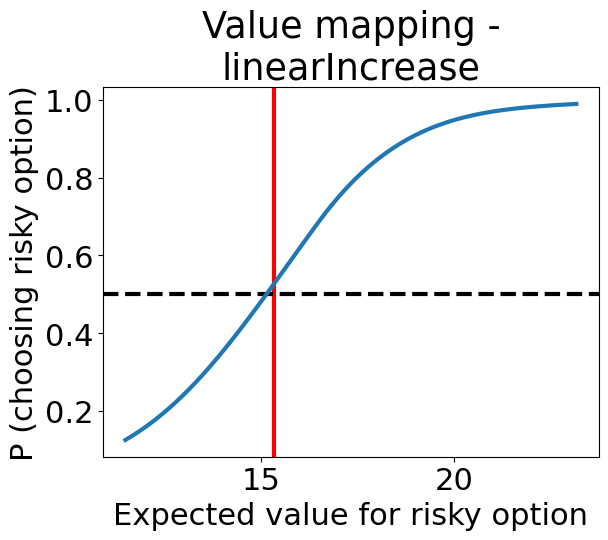

In [2]:
# setting parameters
experimentEffects = "00to180"#"00to45"
risk_prob = 0.75
type = "linearIncrease" 

stim_noise = 10000
rep_ori_noise = 32
rep_val_noise = np.sqrt(tools.factor_val/8)
start = 60/90*np.pi

# Getting all the values from actual transformation
interval = 70/90.*np.pi
if (type=="curvedPrior"):
    rangeOri = np.linspace(start, (start-interval), 100)
else:
    rangeOri = np.linspace(start, (start+interval), 100)

val_range = tools.value_function_ori(rangeOri, type)
safeVal = val_range[0]
riskyVal_range = risk_prob*tools.value_function_ori(rangeOri, type)

# getting inferred safe values
safe_value, safe_prob = model.safe_value_dist(rangeOri[0], stim_noise, rep_ori_noise, rep_val_noise, type)
risky_value, risky_prob = model.risky_value_dist((rangeOri), stim_noise, rep_ori_noise, rep_val_noise, risk_prob, type)


# # Risk attitudes 
p_chose_risky = tools.diff_dist(safe_value, risky_prob, safe_prob)

# The value of the safe option
plt.axvline(safeVal, c='r', label = "safe option\n value")
# Where the risky option value is the same as the safe option value,
# the probability of chosing should have been 0.5 i there were no biases at all.
plt.axhline(0.5, c='k', ls='--')
# plt.ylim(0.4,0.6)

# Plotting the risky option value throughout the range and comparing where it crosses the 0.5 probability mark
# and whether it is equal to the actual rational equilibrium that would have been without biases.
plt.plot(riskyVal_range, np.squeeze(p_chose_risky))#, label=['rep',kappa_r, "stim (deg)",round(kappa_s*180,2)])

plt.xlabel("Expected value for risky option")
plt.ylabel("P (choosing risky option)")
plt.title("Value mapping -\n" + type) 

# plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

tools.get_rnp(safeVal, val_range, p_chose_risky, risk_prob)



# comparing models : same noise regimes fopr safe and risky option 2 parameters varied

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 22
plt.rcParams['lines.linewidth'] = 3
import seaborn as sns




# sns.set_context('talk|')?
import scipy.stats as ss
import math
from scipy.integrate import simpson, trapezoid
import numpy as np

import scipy.interpolate as interpolate
from scipy.interpolate import UnivariateSpline, interp1d
from ipywidgets import interact
from scipy import integrate
import scipy.stats as ss

import riskDualObserverSeperate as model
import tools as tools

In [2]:
def rnp_across_safeVals(stim_noise, rep_ori_noise, rep_val_noise, type, risk_prob, experimentEffects):

    # Getting all the values from actual transformation
    end = int(experimentEffects[-3:])-1
    start = int(experimentEffects[0:2])+1
    end = end/90.*np.pi
    start = start/90.*np.pi
    
    if (type =="linearDecrease"):
        start_safe = float(tools.inverse_monotonic(tools.value_function_ori(start, type)/1.5, type))
        safe_angles =  np.linspace(end, start_safe, int((end*90/np.pi-start_safe*90/np.pi+1)/3))
    else:
        end_safe = float(tools.inverse_monotonic(tools.value_function_ori(end, type)/1.5, type))
        safe_angles =  np.linspace(start, end_safe, int((start*90/np.pi+end_safe*90/np.pi-1)/3))
    
    # print("safe angles - ",safe_angles)
    rnp = np.zeros(len(safe_angles))
    slope = np.zeros(len(safe_angles))
    safeVals = np.zeros(len(safe_angles))

    for i in range(len(safe_angles)):
        interval = abs(float(tools.inverse_monotonic(tools.value_function_ori(safe_angles[i], type), type)-tools.inverse_monotonic(tools.value_function_ori(safe_angles[i], type)*1.5, type)))
        if (type=="linearDecrease"):
            rangeOri = np.linspace(safe_angles[i],  safe_angles[i]-(interval), 20)
        else:
            rangeOri = np.linspace(safe_angles[i],  safe_angles[i]+(interval), 20)

        # print("range - ", rangeOri)
        # print("interval - ",interval)

        safeVal = float(tools.value_function_ori(safe_angles[i], type))
        safeVals[i] = safeVal
        val_range = tools.value_function_ori(rangeOri, type)
        riskyVal_range = risk_prob*tools.value_function_ori(rangeOri, type)

        # getting inferred safe values
        safe_value, safe_prob = model.safe_value_dist(safe_angles[i], stim_noise, rep_ori_noise, rep_val_noise , type, p_val = 2, p_per = 8)
        rr, risky_prob = model.risky_value_dist((rangeOri), stim_noise, rep_ori_noise, rep_val_noise, risk_prob, type, p_val = 2, p_per = 8)

        # Risk attitudes 
        p_chose_risky = tools.diff_dist(safe_value, risky_prob, safe_prob)
        # print("safe angle - ", safe_angles[i]*90./np.pi)
        # print(p_chose_risky[0,::2])
        rnp[i],slope[i] = tools.get_rnp(safeVal, val_range, p_chose_risky, risk_prob)
        # print(rnp[i])

    return safe_angles, safeVals, rnp, slope



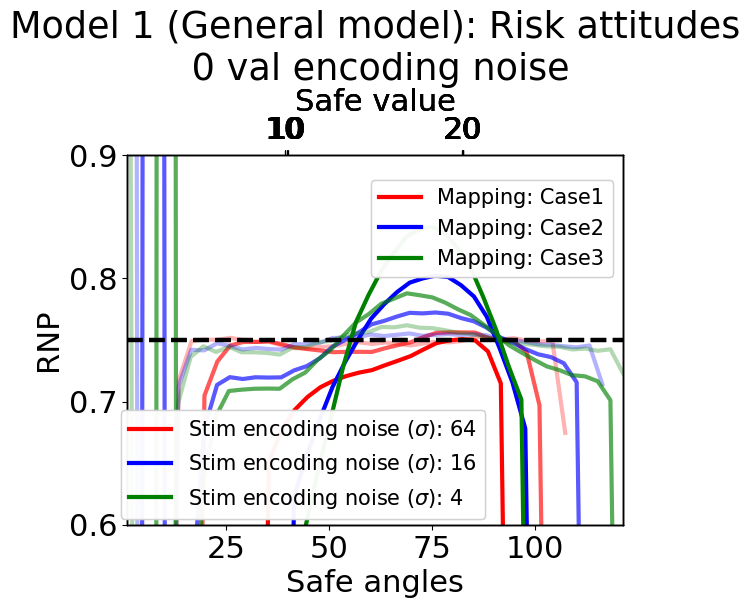

In [4]:
# setting parameters
experimentEffects = tools.experimentRange #"00to45"
risk_prob = 0.75
types = ["scaled_cdf", "linearIncrease", "scaled_inverse_cdf"]
# type = "curved_cdf_prior"

signs = ["x", "o", ".", "v"] 
colorList = ["r", "b", "g", "m", "y", "k"]
alphaList = np.linspace(0.3, 1.0, 3)
# alphaList = alphaList[np.argsort(sigma_rep)][::-1]

fig = plt.figure()
ax1 = fig.add_subplot(111)

j = -1
type_lines = []
for type in types:
    j = j+1
    # changeable parameters
    stim_noise = 100000
    rep_ori_list = [64, 16, 4]
    rep_val_noise = np.sqrt(tools.factor_val/10000)

    i = 0
    for rep_ori_noise in rep_ori_list:

        safe_angles, safeVals, rnp, slope = rnp_across_safeVals(stim_noise, rep_ori_noise, rep_val_noise, type, risk_prob, experimentEffects)
        ax1.set_ylim(0.6, 0.9)
        ax1.set_xlim(min(safe_angles*90./np.pi), max(safe_angles*90./np.pi))

        text = "rep stim noise ($\sigma$): "+str(round(rep_ori_noise,2))
        line = ax1.plot(safe_angles[:]*90./np.pi, rnp[:], color = colorList[j], alpha = alphaList[i], label = text)

        ax2 = ax1.twiny()
        if (type=="linearDecrease"):
            ax2.set_xlim(max(safeVals), min(safeVals))

        ax2.plot(safeVals, np.ones(len(safeVals))/1.3, alpha=0.0)

        i = i+1
    if line:
        type_lines.append(line[0])

    ax1.axhline(risk_prob, c='k', ls='--')

    ax2.set_xlabel("Safe value")
    ax1.set_xlabel("Safe angles")
    ax1.set_ylabel("RNP")

# Create the first legend for mapping types
mapping_labels = ["Mapping: Case1", "Mapping: Case2", "Mapping: Case3"]
mapping_legend = fig.legend(type_lines, mapping_labels, loc="upper right", bbox_to_anchor=(0.9, 0.85), fontsize=15)

# Create the second legend for value encoding noises
noise_labels = [f"Stim encoding noise ($\sigma$): {round(sigma_rep, 2)}" for sigma_rep in rep_ori_list]
noise_legend = fig.legend(type_lines, noise_labels, loc="lower right", bbox_to_anchor=(0.7, 0.1), fontsize=15)

ax1.set_title("Model 1 (General model): Risk attitudes\n 0 val encoding noise")

# Add the legends to the figure
fig.gca().add_artist(mapping_legend)
fig.gca().add_artist(noise_legend)




Assumption that sensory and value noise cannot be independantly varied. 

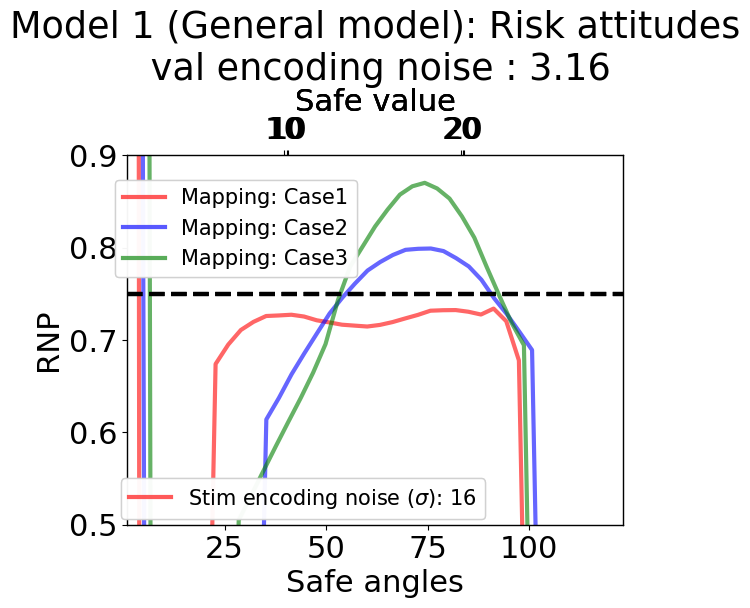

In [5]:
# setting parameters
experimentEffects = tools.experimentRange #"00to45"
risk_prob = 0.75
types = ["scaled_cdf", "linearIncrease", "scaled_inverse_cdf"]
# type = "curved_cdf_prior"

signs = ["x", "o", ".", "v"] 
colorList = ["r", "b", "g", "m", "y", "k"]
alphaList = np.linspace(0.6, 0.6, 3)
# alphaList = alphaList[np.argsort(sigma_rep)][::-1]

fig = plt.figure()
ax1 = fig.add_subplot(111)

j = -1
type_lines = []
for type in types:
    j = j+1
    # changeable parameters
    stim_noise = 100000
    rep_ori_list = [16]
    rep_val_noise = np.sqrt(tools.factor_val/4)

    i = 0
    for rep_ori_noise in rep_ori_list:

        safe_angles, safeVals, rnp, slope = rnp_across_safeVals(stim_noise, rep_ori_noise, rep_val_noise, type, risk_prob, experimentEffects)
        ax1.set_ylim(0.5, 0.9)
        ax1.set_xlim(min(safe_angles*90./np.pi), max(safe_angles*90./np.pi))

        text = "rep stimulus noise ($\sigma$): "+str(round(rep_ori_noise,2))
        line = ax1.plot(safe_angles[:]*90./np.pi, rnp[:], color = colorList[j], alpha = alphaList[i], label = text)

        ax2 = ax1.twiny()
        if (type=="linearDecrease"):
            ax2.set_xlim(max(safeVals), min(safeVals))

        ax2.plot(safeVals, np.ones(len(safeVals))/1.3, alpha=0.0)

        i = i+1
    if line:
        type_lines.append(line[0])

    ax1.axhline(risk_prob, c='k', ls='--')

    ax2.set_xlabel("Safe value")
    ax1.set_xlabel("Safe angles")
    ax1.set_ylabel("RNP")

# Create the first legend for mapping types
mapping_labels = ["Mapping: Case1", "Mapping: Case2", "Mapping: Case3"]
mapping_legend = fig.legend(type_lines, mapping_labels, loc="upper right", bbox_to_anchor=(0.5, 0.85), fontsize=15)

# Create the second legend for value encoding noises
noise_labels = [f"Stim encoding noise ($\sigma$): {round(sigma_rep, 2)}" for sigma_rep in rep_ori_list]
noise_legend = fig.legend(type_lines, noise_labels, loc="lower right", bbox_to_anchor=(0.7, 0.1), fontsize=15)

ax1.set_title("Model 1 (General model): Risk attitudes\n val encoding noise : " + str(round(rep_val_noise,2)))

# Add the legends to the figure
fig.gca().add_artist(mapping_legend)
fig.gca().add_artist(noise_legend)




In [4]:
tools.scaling

1.8

Assumption that sensory noise can be independantly varied but not value noise.

ori-  100000 val:  3.1622776601683795


KeyboardInterrupt: 

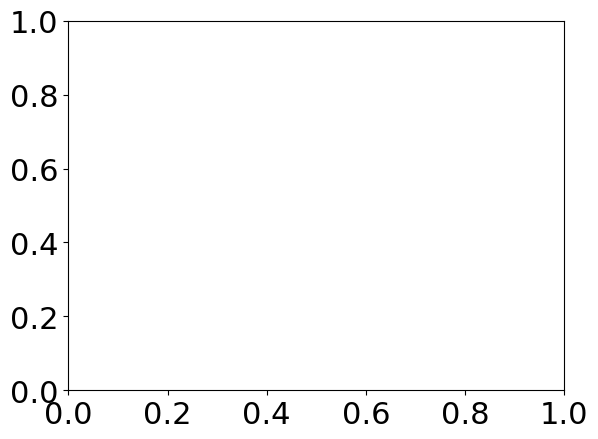

In [64]:

# setting parameters
experimentEffects = tools.experimentRange #"00to45"
risk_prob = 0.75
# type = "curved_cdf_prior" 
types = ["scaled_cdf"]
k = -1
fig = plt.figure()
ax1 = fig.add_subplot(111)

for type in types:
    k = k+1
    # changeable parameters
    stim_list = [100000]
    rep_ori_list = [100000]
    rep_val_list = [np.sqrt(tools.factor_val/4)]
    # high stim noise
    # stim_list = [64, 16]
    # rep_ori_list = [128]
    # rep_val_list = [np.sqrt(tools.factor_val/128)]


    alphaList = np.linspace(0.3, 1.0, len(rep_ori_list))
    # alphaList = np.linspace(0.3, 1.0, len(rep_ori_list))
    colorList = ["b", "g", "r", "c", "m", "y", "k"]
    for stim_noise in stim_list:
        j = -1
        for rep_ori_noise in rep_ori_list:
            j = j+1
            i = -1
            for rep_val_noise in rep_val_list:
                i = i+1
                print("ori- ", rep_ori_noise, "val: ", rep_val_noise)
                safe_angles, safeVals, rnp, slope = rnp_across_safeVals(stim_noise, rep_ori_noise, rep_val_noise, type, risk_prob, experimentEffects)
                ax1.set_ylim(0.65, 0.85)
                ax1.set_xlim(min(safe_angles*90./np.pi), max(safe_angles*90./np.pi))
                if type == "scaled_cdf":
                    text = "stim_rep ($\kappa$): "+str(rep_ori_noise) + "; value_rep ($\sigma$): "+str(round(rep_val_noise,2))
                else:
                    text = "stim_rep ($\kappa$): "+str(rep_ori_noise) + "; value_rep ($\sigma$): "+str(round(rep_val_noise,2))
                
                ax1.plot(safe_angles[:]*90./np.pi, rnp[:], color=colorList[0], label = text, alpha =  alphaList[j])

                ax2 = ax1.twiny()
                if (type=="linearDecrease"):
                    ax2.set_xlim(max(safeVals), min(safe_angles))

                ax2.plot(safeVals, np.ones(len(safeVals))/1.3, alpha=0.0)

    ax1.axhline(risk_prob, c='k', ls='--')
    ax1.legend(bbox_to_anchor=(0.6, 0.6), prop={'size': 10})

    ax2.set_xlabel("Safe value")
    ax1.set_xlabel("Safe angles")
    ax1.set_ylabel("RNP")

    if type == "scaled_cdf":
        ax1.set_title("Decoding prior - " + tools.contextual_prior + "\n General model: type: "+type+str(tools.scaling))

    else:
        ax1.set_title("Decoding prior - " + tools.contextual_prior + "\n General model: type: "+type)

    fig.savefig("/Users/sbedi/Downloads/"+"RNP-general-"+type+".png",dpi=300, bbox_inches = "tight")
    


# Different noises for two options

In [ ]:
def rnp_diffNoises(stim_noise, safe_rep_ori_noise, risky_rep_ori_noise, safe_rep_val_noise, risky_rep_val_noise, type, risk_prob, experimentEffects):

    # Getting all the values from actual transformation
    end = int(experimentEffects[-3:])-1
    start = int(experimentEffects[0:2])+1
    end = end/90.*np.pi
    start = start/90.*np.pi
    
    if (type=="prior" or type=="curvedPrior" or type =="linearDecrease"):
        start_safe = float(tools.inverse_monotonic(tools.value_function_ori(start, type)/1.5, type))
        safe_angles =  np.linspace(end, start_safe, int((end*90/np.pi-start_safe*90/np.pi+1)/3))
    else:
        end_safe = float(tools.inverse_monotonic(tools.value_function_ori(end, type)/1.5, type))
        safe_angles =  np.linspace(start, end_safe, int((start*90/np.pi+end_safe*90/np.pi-1)/3))
    
    # print("safe angles - ",safe_angles)
    rnp = np.zeros(len(safe_angles))
    safeVals = np.zeros(len(safe_angles))

    for i in range(len(safe_angles)):
        interval = abs(float(tools.inverse_monotonic(tools.value_function_ori(safe_angles[i], type), type)-tools.inverse_monotonic(tools.value_function_ori(safe_angles[i], type)*1.5, type)))
        if (type=="prior" or type=="curvedPrior" or type=="linearDecrease"):
            rangeOri = np.linspace(safe_angles[i],  safe_angles[i]-(interval), 20)
        else:
            rangeOri = np.linspace(safe_angles[i],  safe_angles[i]+(interval), 20)

        # print("range - ", rangeOri*90/np.pi)
        # print("interval - ",interval)

        safeVal = float(tools.value_function_ori(safe_angles[i], type))
        safeVals[i] = safeVal
        val_range = tools.value_function_ori(rangeOri, type)
        riskyVal_range = risk_prob*tools.value_function_ori(rangeOri, type)

        # print("safeval - ", safeVal, "range val - ", val_range)

        # getting inferred safe values for the two different noise types forthe two options
        safe_value, safe_prob = model.safe_value_dist(safe_angles[i], stim_noise, safe_rep_ori_noise, safe_rep_val_noise , type)
        rr, risky_prob = model.risky_value_dist((rangeOri), stim_noise, risky_rep_ori_noise, risky_rep_val_noise, risk_prob, type)

        # Risk attitudes 
        p_chose_risky = tools.diff_dist(safe_value, risky_prob, safe_prob)
        print("safe angle - ", safe_angles[i]*90./np.pi)
        print(p_chose_risky[0,::2])
        rnp[i] = tools.get_rnp(safeVal, val_range, p_chose_risky, risk_prob)
        print(rnp[i])

    return safe_angles, safeVals, rnp



In [ ]:
# setting parameters
experimentEffects = tools.experimentRange #"00to45"
risk_prob = 0.75
types = ["cdf_prior"]
# type = "curved_cdf_prior"

for type in types:

    # changeable parameters
    stim_list = [10000]
    safe_ori_rep_list = [64, 16, 4]
    risky_ori_rep_list = [64, 16, 4]
    safe_val_rep_list = [64, 16, 4]
    risky_val_rep_list = [64, 16, 4]

    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    alphaList = np.linspace(0.3, 1.0, len(risky_rep_list))
    alphaList = alphaList[np.argsort(risky_rep_list)][::-1]
    colorList = ["b", "g", "r", "c", "m", "y", "k"]
    j = -1
    for stim_noise in stim_list:
        for safe_rep_noise in safe_rep_list:
            j = j+1
            i = -1
            for risky_rep_noise in risky_rep_list:
                i = i+1
                safe_angles, safeVals, rnp = rnp_diffNoises(stim_noise, safe_rep_noise, risky_rep_noise, type, risk_prob, experimentEffects)
                ax1.set_ylim(0.7, 0.8)
                ax1.set_xlim(min(safe_angles*90./np.pi), max(safe_angles*90./np.pi))

                text = "safe_rep ($\kappa$): "+str(safe_rep_noise) + "; risky_rep ($\kappa$): "+str(risky_rep_noise)
                ax1.plot(safe_angles[:]*90./np.pi, rnp[:], color=colorList[j], label = text, alpha =  alphaList[i])

                ax2 = ax1.twiny()
                if (type=="prior" or type=="curvedPrior" or type == "linearDecrease"):
                    ax2.set_xlim(max(safeVals), min(safe_angles))

                ax2.plot(safeVals, np.ones(len(safeVals))/1.3, alpha=0.0)

    ax1.axhline(risk_prob, c='k', ls='--')
    ax1.legend(bbox_to_anchor=(0.6, 0.6), prop={'size': 10})

    ax2.set_xlabel("Safe value")
    ax1.set_xlabel("Safe angles")
    ax1.set_ylabel("RNP")
    if type == "scaled_cdf":
        ax1.set_title("Decoding prior - " + tools.contextual_prior + "\n Perception model : " + type+str(tools.scaling)) 
    else:
        ax1.set_title("Decoding prior - " + tools.contextual_prior + "\n Perception model : " + type) 

    plt.savefig("/Users/sbedi/Downloads/diffNoises-perception"+tools.contextual_prior+".png",dpi=300, bbox_inches = "tight")
    